In [ ]:
import pandas as pd

In [ ]:
import pickle

with open("/content/sentences.txt", "rb") as fp:   # Unpickling
  b = pickle.load(fp)

In [ ]:
type(b)

list

In [ ]:
len(b)

16036

In [ ]:
total_sentences = []

In [ ]:
for i in b:
  if (len(i)>0):
    a=' '.join(i)
    total_sentences.append(a)
  # else:
  #   print(i)

In [ ]:
len(total_sentences)

13726

In [ ]:
total_sentences[0]

'congratulations on you celebrating british kid singers sophia grace s and rosie s 1st anniversary of a visit of your show'

In [ ]:
!pip install sentencepiece

https://github.com/google/sentencepiece

In [ ]:
fout = open("/content/fasttext/sentences_fasttext.txt","w+",encoding='utf-8')

for line in total_sentences:
    fout.write(line+"\n")
fout.close()

import sentencepiece as spm
# character_coverage=1, for smaller character set - since English has only 26 so going with value=1
spm.SentencePieceTrainer.train(input="/content/fasttext/sentences_fasttext.txt", model_prefix='fasttext_8000vocab_13kdata', vocab_size=8000,character_coverage=1 )
sp = spm.SentencePieceProcessor(model_file='/content/fasttext/fasttext_8000vocab_13kdata.model')
tokenized_file = sp.encode(total_sentences, out_type=str)

In [ ]:
from gensim.models import FastText

for i in range(5,50,5):
    model_ft = FastText(size=256, window=5, min_count=1,  sentences=tokenized_file, iter=i, sg=1)
    model_ft.save("/content/fasttext/8kvocab13kdata_trained/model_fasttext_"+str(i))
    del model_ft

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models.fasttext import FastText
model = FastText.load('/content/drive/MyDrive/fasttext/8kvocab13kdata_trained/model_fasttext_45')

In [ ]:
model

In [ ]:
model.wv.most_similar('chicken', topn=10)

[('▁chicken', 0.804603099822998),
 ('ken', 0.5252937078475952),
 ('▁chick', 0.4755687713623047),
 ('▁aloo', 0.41547125577926636),
 ('▁khaana', 0.35485392808914185),
 ('▁khaane', 0.34873729944229126),
 ('▁shehzaad', 0.3437119126319885),
 ('▁sheen', 0.34190887212753296),
 ('▁sticker', 0.334621399641037),
 ('ikel', 0.333866685628891)]

In [ ]:
model.wv.most_similar('yaar', topn=10)

[('▁yaar', 0.7225233316421509),
 ('▁pyaar', 0.6896035671234131),
 ('▁hathyaar', 0.6529714465141296),
 ('aar', 0.6262264251708984),
 ('gaar', 0.6193248629570007),
 ('▁taiyaar', 0.6123553514480591),
 ('kaar', 0.5985432267189026),
 ('▁pukaar', 0.5728492736816406),
 ('▁angaar', 0.5319229364395142),
 ('▁shikaar', 0.5302640199661255)]

In [ ]:
model.wv.most_similar('pagal', topn=10)

[('▁pagal', 0.9197119474411011),
 ('▁paagal', 0.5663855075836182),
 ('angal', 0.42212265729904175),
 ('▁pagl', 0.41848325729370117),
 ('▁mangal', 0.395018607378006),
 ('▁pagli', 0.3870737552642822),
 ('panti', 0.379109263420105),
 ('▁gupt', 0.3789604604244232),
 ('▁gal', 0.3608347177505493),
 ('▁gaurav', 0.3602217137813568)]

In [ ]:
model.wv.most_similar('suno', topn=10)

[('▁suno', 0.8520692586898804),
 ('▁uparwal', 0.40766289830207825),
 ('▁milke', 0.37956660985946655),
 ('81', 0.379521906375885),
 ('▁barta', 0.370370477437973),
 ('▁kheer', 0.36860159039497375),
 ('▁kno', 0.3611159324645996),
 ('▁walon', 0.358684241771698),
 ('▁lmfao', 0.35693907737731934),
 ('▁saurabh', 0.3515463173389435)]

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
def tsne_plot(for_word, w2v_model,num):
    # trained fastText model dimention
    dim_size = w2v_model.wv.vectors.shape[1]
 
    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']
 
    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)
 
    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=num)
 
    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
 
    #---------------------- Apply PCA and tsne to reduce dimention --------------
 
    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = num).fit_transform(arrays)
 
    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)
 
    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})
 
    #------------------------- tsne plot Python -----------------------------------
 
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )
 
    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)
 
 
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
 
    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')


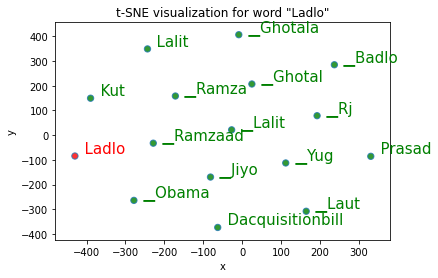

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

tsne_plot(for_word='ladlo', w2v_model=model,num=15)

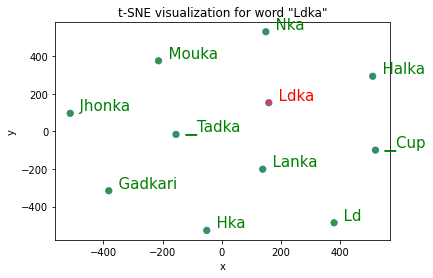

In [ ]:
tsne_plot(for_word='ldka', w2v_model=model,num=10)

In [ ]:
from gensim.models import FastText

model2 = FastText(size=256, window=5, min_count=1,  sentences=b, iter=45, sg=1)

In [ ]:
model2.wv.most_similar('chicken', topn=10)

[('chickens', 0.8734339475631714),
 ('chick', 0.8631123304367065),
 ('chicks', 0.8571001291275024),
 ('chic', 0.7797752618789673),
 ('chizen', 0.7585852146148682),
 ('chikoo', 0.7462300658226013),
 ('chize', 0.7420822978019714),
 ('chirkut', 0.7300093770027161),
 ('chichha', 0.7284895777702332),
 ('chidh', 0.7283809781074524)]

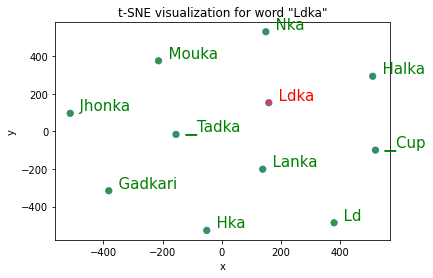

In [ ]:
tsne_plot(for_word='ldka', w2v_model=model,num=10)

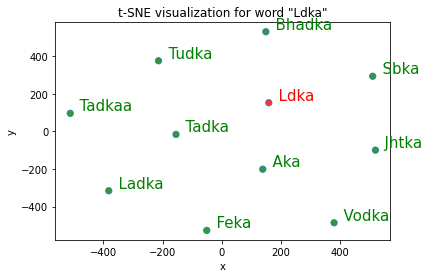

In [ ]:
tsne_plot(for_word='ldka', w2v_model=model2,num=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


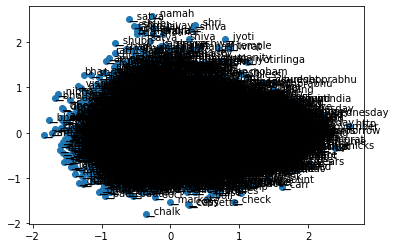

In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# Train dataset

In [ ]:
import gensim
from gensim import corpora
from gensim.models import Word2Vec

In [ ]:
# train model
model3 = Word2Vec(b, min_count=1)
# summarize the loaded model
print(model3)
# summarize vocabulary
words = list(model3.wv.vocab)
print(words)
# access vector for one word
print(model3['sentence'])
# save model
# model.save('/content/drive/MyDrive/Hinglish Emoji Recommendation /Word embeddings/trainedEmbeddingsWord2Vec/model.bin')

Word2Vec(vocab=20227, size=100, alpha=0.025)
['congratulations', 'on', 'you', 'celebrating', 'british', 'kid', 'singers', 'sophia', 'grace', 's', 'and', 'rosie', '1st', 'anniversary', 'of', 'a', 'visit', 'your', 'show', 'rt', 'uske', 'liye', 'toh', 'bahot', 'kuch', 'karna', 'padega', 'ye', 'pappiyon', 'se', 'kaam', 'nahi', 'chalega', 'yehi', 'to', 'hum', 'semjhane', 'ki', 'koshish', 'kar', 'rahe', 'hain', 'log', 'sab', 'ko', 'issi', 'mein', 'tol', 'dete', 'cake', 'kaha', 'i', 'm', 'in', 'hawaii', 'at', 'the', 'moment', 'home', 'next', 'friday', 'night', 'don', 't', 'want', 'come', 'jeet', 'ka', 'jashn', 'aur', 'shubah', 'shuruat', 'eating', 'bread', 'pakoda', 'tandon', 'cottage', 'vaishali', '1', 'sookha', 'puri', 'dena', 'bhaiyapic', 'twitter', 'com', 'matlab', 'tum', 'karishma', 'nahin', 'raveena', 'ho', 'woh', 'jo', 'thi', 'ab', 'kahan', 'ravana', 'sachai', 'hogayi', 'aankho', 'sahi', 'me', 'kaun', 'hai', 'zaleel', 'haan', 'khidki', 'khuli', 'jismein', 'baburao', 'jhaank', 'raha', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
# load model
# model = Word2Vec.load('/content/drive/MyDrive/Hinglish Emoji Recommendation /Word embeddings/trainedEmbeddingsWord2Vec/model.bin')
# print(model)

Word2Vec(vocab=54075, size=100, alpha=0.025)


### Visualize

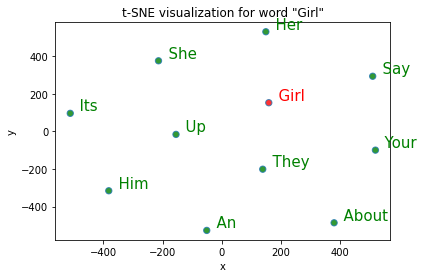

In [ ]:
tsne_plot(for_word='girl', w2v_model=model3,num=10)

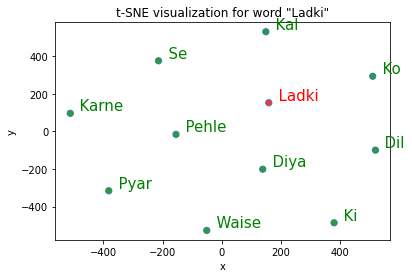

In [ ]:
tsne_plot(for_word='ladki', w2v_model=model3,num=10)

In [ ]:
tsne_plot(for_word='ldki', w2v_model=model3,num=10)

KeyError: ignored

In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
result.shape

(54075, 2)

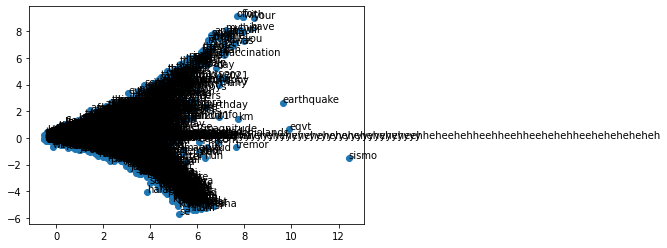

In [ ]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model3.wv.vocab)

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()

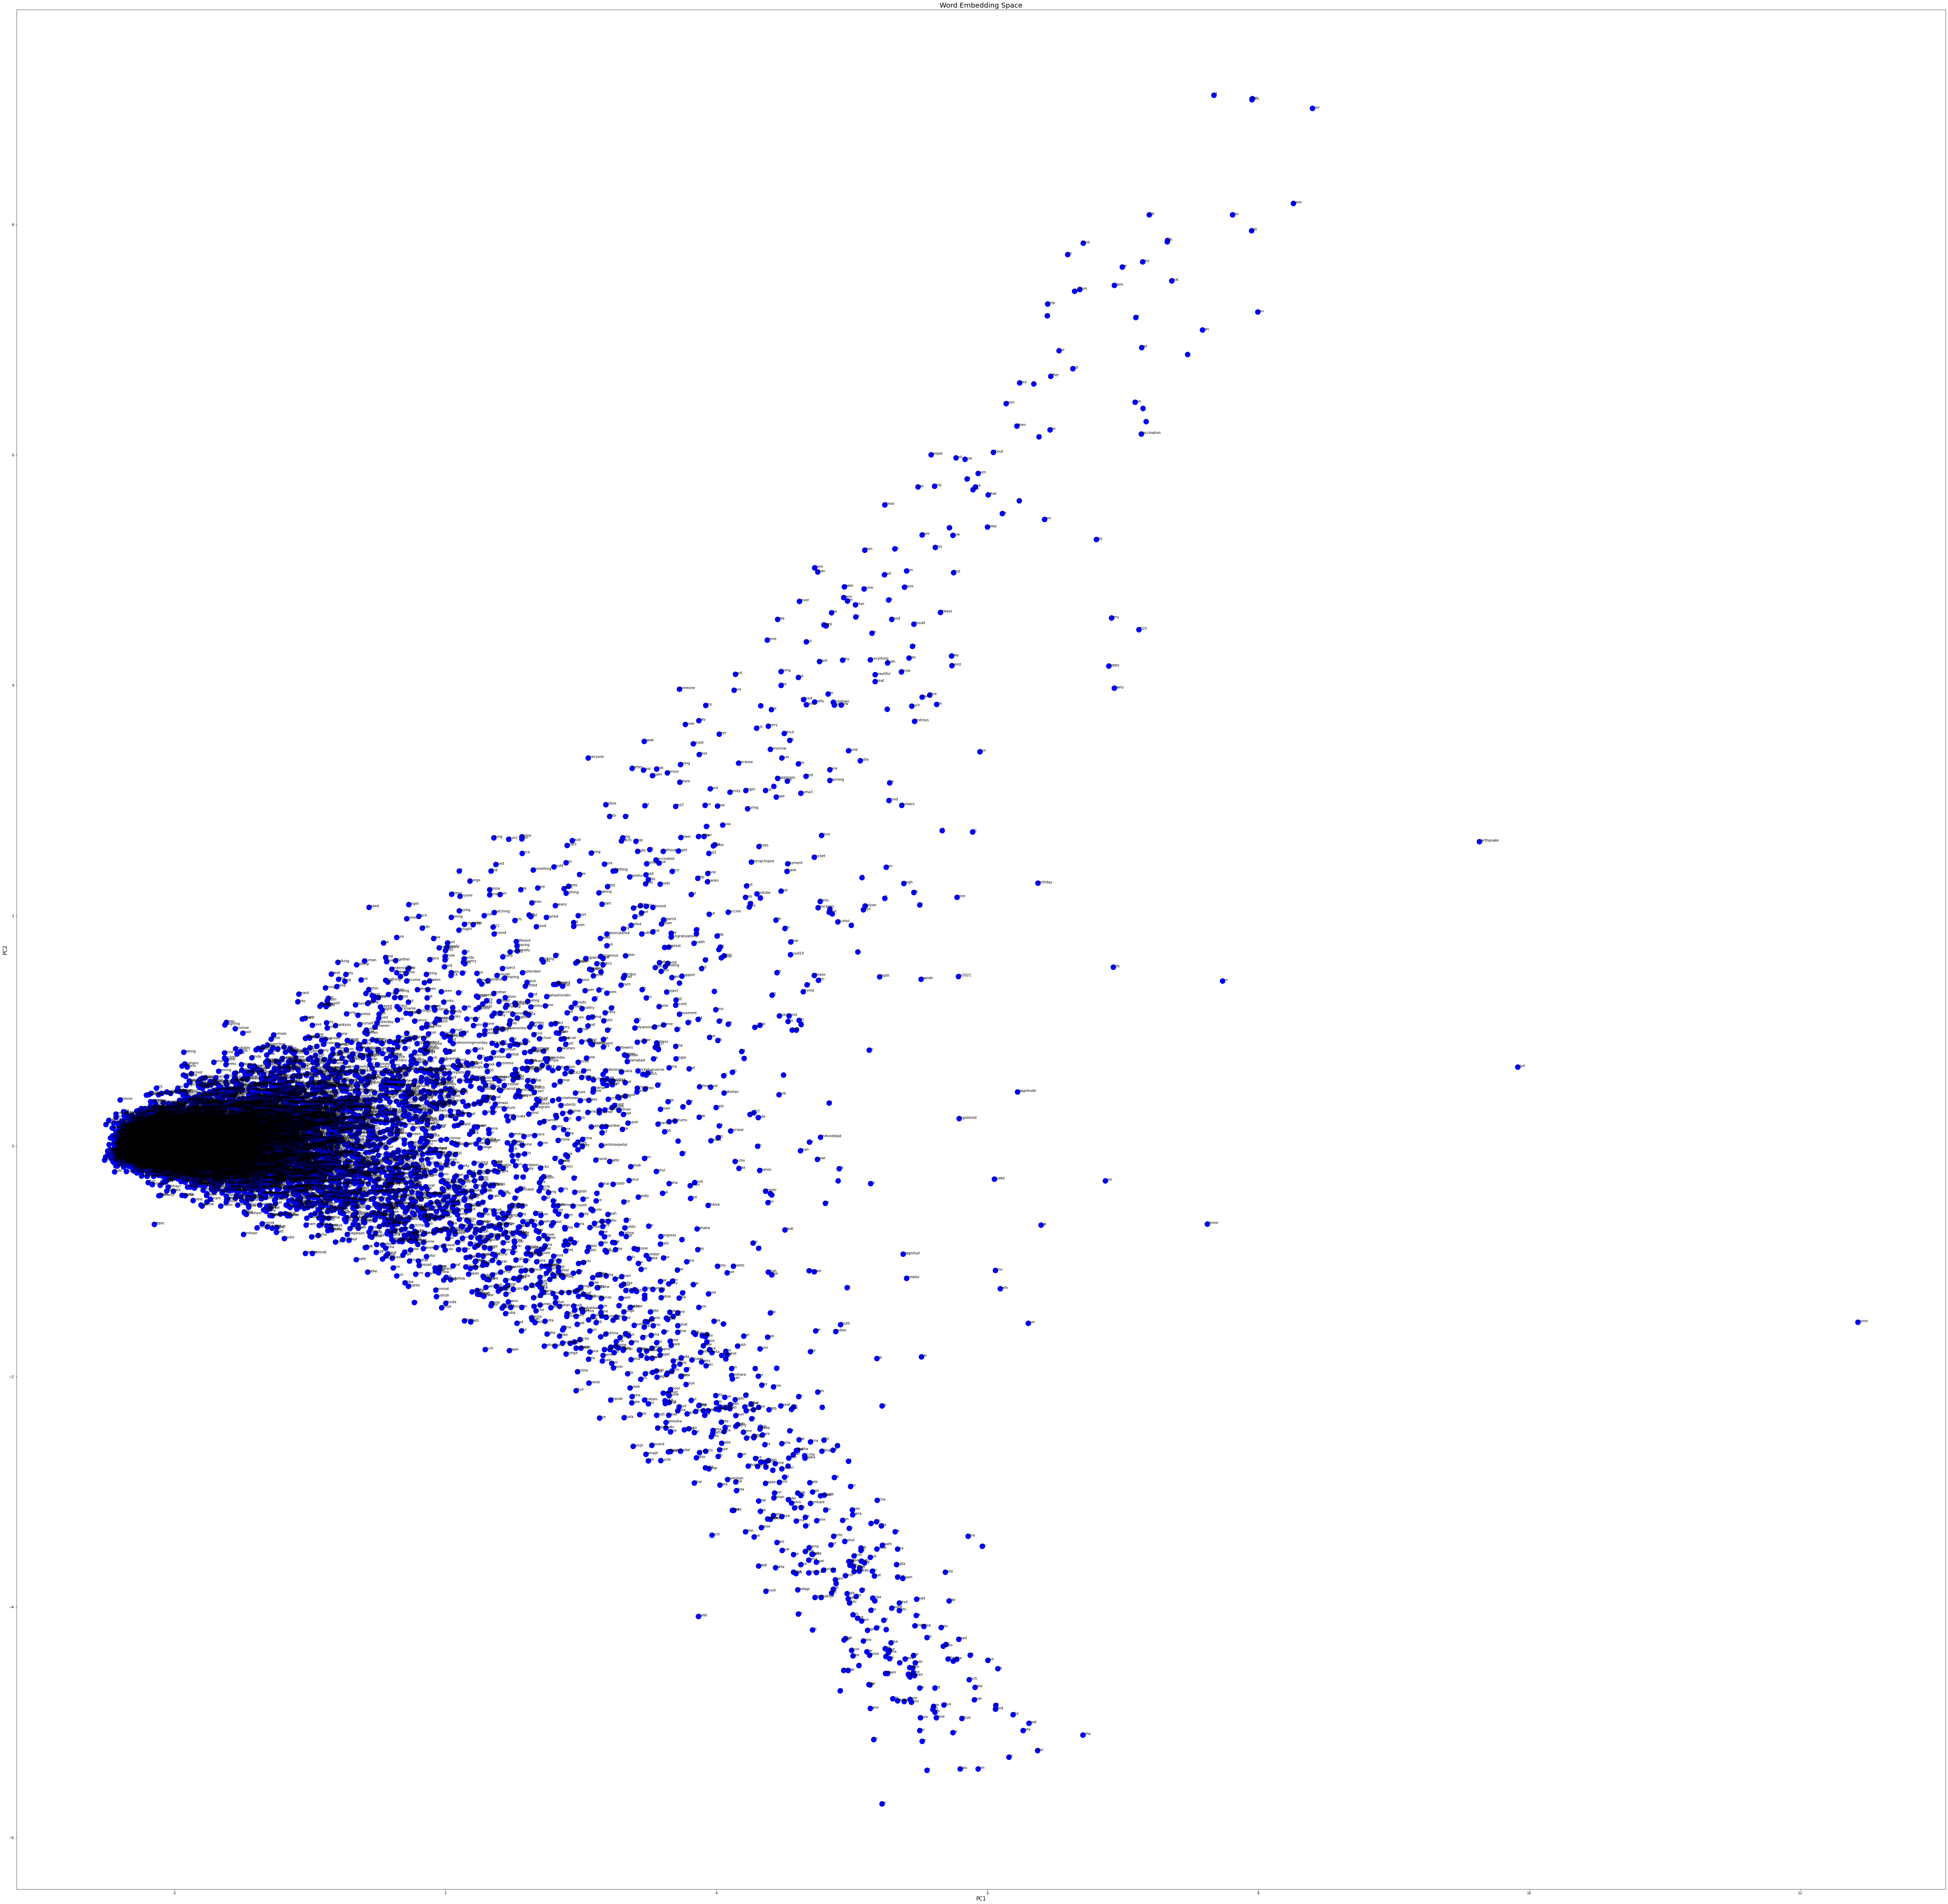

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
plt.scatter(result[:,0],result[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(result[i,0],result[i,1]))